In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy import misc, ndimage
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


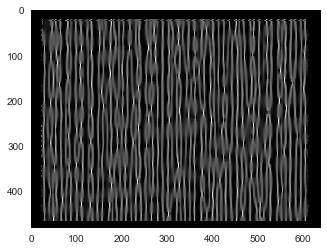

In [2]:
x_0 = misc.imread('Rogue_Wave_Dataset/Normal_Waves/seed_1/Trajectories.png', flatten=True)
plt.imshow(x_0)
plt.grid(False)
plt.show()

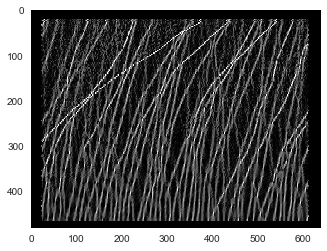

In [3]:
x_0 = misc.imread('Rogue_Wave_Dataset/Giant_Waves/seed_1/Trajectories.png', flatten=True)
plt.imshow(x_0)
plt.grid(False)
plt.show()

In [4]:
x_0.shape

(480, 640)

In [5]:
x = []
y = []

for j in range(1,51):
    image_filename = 'Rogue_Wave_Dataset/Normal_Waves/seed_%d/Trajectories.png'%j
    image = misc.imread(image_filename, flatten=True)
    h = 120.0/image.shape[0]
    l = 160.0/image.shape[1]
    image = ndimage.zoom(image,(h,l))
    x.append(image)
    y.append(0)

In [6]:
for j in range(1,51):
    image_filename = 'Rogue_Wave_Dataset/Giant_Waves/seed_%d/Trajectories.png'%j
    image = misc.imread(image_filename, flatten=True)
    h = 120.0/image.shape[0]
    l = 160.0/image.shape[1]
    image = ndimage.zoom(image,(h,l))
    x.append(image)
    y.append(1)

In [7]:
x = np.array(x)
y = np.array(y)
#x,y = shuffle(x,y)

In [8]:
x.shape

(100, 120, 160)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3)

In [10]:
num_classes = 2
img_rows, img_cols = 120, 160
input_shape = (img_rows, img_cols, 1)

In [11]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_train /= 255
x_test /= 255

In [12]:
model = Sequential()
model.add(Conv2D(filters = 40, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid')) #'sigmoid','relu' rectified linear unit

In [13]:
model.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
70/70 [==============================] - 1s - loss: 2.4603 - acc: 0.5000     
Epoch 2/15
70/70 [==============================] - 1s - loss: 1.7557 - acc: 0.4143     
Epoch 3/15
70/70 [==============================] - 1s - loss: 1.6465 - acc: 0.4143     
Epoch 4/15
70/70 [==============================] - 1s - loss: 0.7207 - acc: 0.5857     
Epoch 5/15
70/70 [==============================] - 0s - loss: 0.7529 - acc: 0.7000     
Epoch 6/15
70/70 [==============================] - 0s - loss: 0.6718 - acc: 0.7429     
Epoch 7/15
70/70 [==============================] - 0s - loss: 0.4321 - acc: 0.7857     
Epoch 8/15
70/70 [==============================] - 0s - loss: 0.6312 - acc: 0.7143     
Epoch 9/15
70/70 [==============================] - 0s - loss: 0.2617 - acc: 1.0000     
Epoch 10/15
70/70 [==============================] - 1s - loss: 0.1879 - acc: 1.0000     
Epoch 11/15
70/70 [==============================] - 1s - loss: 0.2304 - acc: 0.9714     
Epoch 12/15
70/70 [

In [15]:
y_pred = np.round(model.predict(x_test, batch_size= x_test.shape[0]))[:,0]

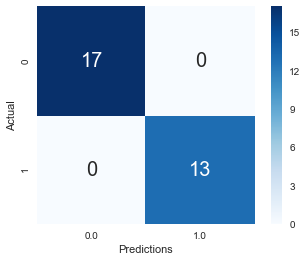

In [16]:
table = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predictions'])

sbn.heatmap(table, cbar=True, cmap='Blues',annot=True, square=True, fmt='d', annot_kws={'size': 20})

plt.show()

In [17]:
model.evaluate(x_test, y_test, verbose=0) # [loss, accuracy]

[0.21215872466564178, 1.0]